### 3.4.1 学習コードの実装

In [1]:
include("../common/trainer.jl")
include("../common/optimizer.jl")
include("./simple_cbow.jl")
include("../common/util.jl")

convert_one_hot (generic function with 1 method)

In [2]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

1000

In [3]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

([1, 2, 3, 4, 5, 2, 6, 7], Dict{Any,Any}("say" => 2,"goodbye" => 3,"you" => 1,"hello" => 6,"." => 7,"and" => 4,"i" => 5), Dict{Any,Any}(7 => ".",4 => "and",2 => "say",3 => "goodbye",5 => "i",6 => "hello",1 => "you"))

In [4]:
vocab_size = length(word_to_id)
contexts, target = create_context_target(corpus, window_size=1)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

6×2×7 Array{Int32,3}:
[:, :, 1] =
 1  0
 0  0
 0  0
 0  0
 0  0
 0  0

[:, :, 2] =
 0  0
 1  0
 0  0
 0  1
 0  0
 1  0

[:, :, 3] =
 0  1
 0  0
 1  0
 0  0
 0  0
 0  0

[:, :, 4] =
 0  0
 0  1
 0  0
 1  0
 0  0
 0  0

[:, :, 5] =
 0  0
 0  0
 0  1
 0  0
 1  0
 0  0

[:, :, 6] =
 0  0
 0  0
 0  0
 0  0
 0  1
 0  0

[:, :, 7] =
 0  0
 0  0
 0  0
 0  0
 0  0
 0  1

In [5]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

Trainer(SimpleCBOW(MatMul([[-0.0135281678061477 -0.006675933193014476 … 0.0059896648703329945 -0.005192710473679315; 0.008848782115637934 -0.008486834808313496 … -0.02589271072207625 0.0015531426195604914; … ; 0.0008775256417631849 -0.0017347559723744227 … -0.017352890275096868 0.0027239356448324; -0.0007163738553437476 -0.007890189271787902 … 0.006917833638256126 -0.00291289373517791]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[-0.0135281678061477 -0.006675933193014476 … 0.0059896648703329945 -0.005192710473679315; 0.008848782115637934 -0.008486834808313496 … -0.02589271072207625 0.0015531426195604914; … ; 0.0008775256417631849 -0.0017347559723744227 … -0.017352890275096868 0.0027239356448324; -0.0007163738553437476 -0.007890189271787902 … 0.006917833638256126 -0.00291289373517791]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[-0.010627187343854627 -0.0022257230736271 

In [6]:
fit!(trainer, contexts, target, max_epoch=max_epoch, batch_size=batch_size)

  3.667734 seconds (9.07 M allocations: 459.141 MiB, 6.95% gc time)


In [7]:
using Plots
gr()

Plots.GRBackend()

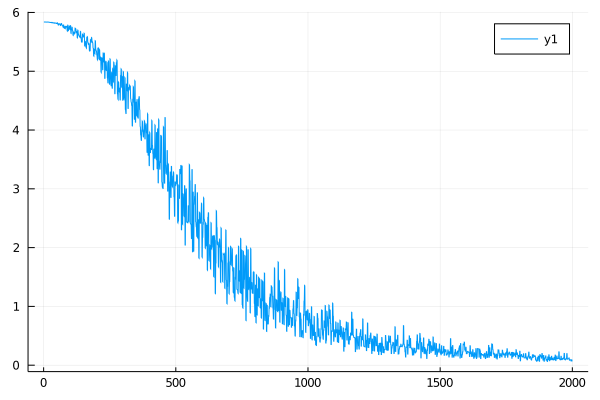

In [8]:
plot(trainer.loss_list)